## Ex 3.

## Part a)

Let's define the hidden state update equation for a vanilla RNN as:

$$
h_t = \sigma(Rh_{t-1} + Ax_t)
$$

Then, the gradient of the hidden state at time \( t \) with respect to the hidden state at time \( t-1 \) is given by:

$$
\frac{\partial h_t}{\partial h_{t-1}} = \sigma'(Rh_{t-1} + Ax_t) \cdot R
$$

The output \( y_t \) is given by:

$$
y_t = Bh_t
$$

By the chain rule, the gradient of the output \( y_t \) with respect to the input \( x_t \) is:

$$
\frac{\partial y_t}{\partial x_t} = B \cdot \frac{\partial h_t}{\partial x_t}
$$

Now, unrolling the computation through time steps using the chain rule, we get:

$$
\frac{\partial y_t}{\partial x_t} = B \cdot \frac{\partial h_t}{\partial h_{t-1}} \cdot \frac{\partial h_{t-1}}{\partial h_{t-2}} \cdots \frac{\partial h_1}{\partial x_t}
$$

From equation (1), we deduce that:

$$
\frac{\partial y_t}{\partial x_t} = B \cdot \prod_{k=1}^{t} \sigma'(Rh_{k-1} + Ax_k) \cdot R^{t-k} \cdot A
$$

Hence, the norm of this gradient is bounded by:

$$
\left\| \frac{\partial y_t}{\partial x_t} \right\| \leq \left\|B\right\| \cdot \left\| \prod_{k=1}^{t} \sigma'(Rh_{k-1} + Ax_k) \cdot R^{t-k} \cdot A \right\| \leq \left\|B\right\| \cdot \prod_{k=1}^{t} \left|\sigma'(Rh_{k-1} + Ax_k)\right|_\infty \cdot \left\|R\right\|^t \cdot \left\|A\right\|
$$

where \( \sigma'(h) \) is the derivative of the tanh activation function, which is \( \sigma'(h) = 1 - \sigma^2(h) \). The term \( \left|\sigma'(Rh_{k-1} + Ax_k)\right|_\infty \) denotes the maximum absolute value of the derivative across all dimensions of \(h_k\).

The right-hand side of the inequality allows us to estimate the maximum change in \( y_t \) for a change in \( x_t \) to be less than or equal to the product of the norms on the right-hand side.


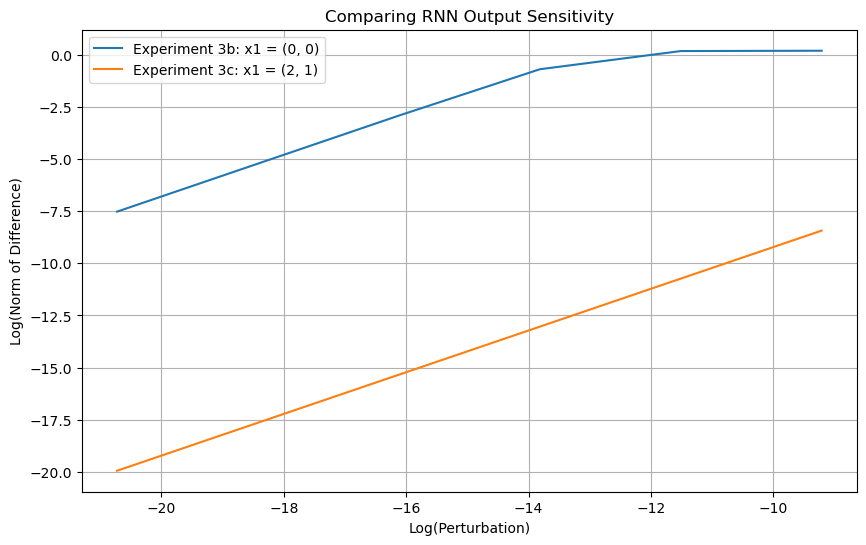

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Constants
A = np.array([[1, 0], [0, 1]], dtype=np.float64)
B = np.array([[1, 0], [0, 1]], dtype=np.float64)
R = np.array([[0.5, -1], [-1, 0.5]], dtype=np.float64)
timesteps = 30
perturbations = np.array([10**-i for i in range(4, 10)], dtype=np.float64)

def compute_output(x, perturbation, extra=False):
    """Compute the RNN output given initial perturbation."""
    H = np.zeros((2, 1), dtype=np.float64)
    x_adjusted = x.copy()
    if extra:
        x_adjusted += np.array([[perturbation], [perturbation]], dtype=np.float64)
    else:
        x_adjusted += np.array([[perturbation], [-perturbation]], dtype=np.float64)

    for _ in range(timesteps):
        H = np.tanh(np.dot(R, H) + np.dot(A, x_adjusted))
    return np.dot(B, H)

def perform_experiment(initial_x):
    """Conduct the experiment and plot results."""
    yt = compute_output(initial_x, 0)
    differences = []

    for perturbation in perturbations:
        yp = compute_output(initial_x, perturbation)
        diff = norm(yt - yp)
        differences.append(diff)

    return np.log(perturbations), np.log(differences)

# Running the experiments
initial_x_zero = np.zeros((2, 1), dtype=np.float64) #[0,0]
initial_x_nonzero = np.array([[2], [1]], dtype=np.float64)

log_perturbations_b, log_diff_b = perform_experiment(initial_x_zero)
log_perturbations_c, log_diff_c = perform_experiment(initial_x_nonzero)

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(log_perturbations_b, log_diff_b, label="Experiment 3b: x1 = (0, 0)")
plt.plot(log_perturbations_c, log_diff_c, label="Experiment 3c: x1 = (2, 1)")
plt.xlabel("Log(Perturbation)")
plt.ylabel("Log(Norm of Difference)")
plt.title("Comparing RNN Output Sensitivity")
plt.legend()
plt.grid(True)
plt.show()


### Part b)
The log-log plot for experiment 3b shows a clear linear relationship between the logarithm of the perturbation size (ε) and the logarithm of the norm of the output difference (||y30−yε30||). As ε increases, the difference between the outputs also decreases, which is consistent with the behavior expected from equation (2). This indicates that the RNN's output is sensitive to changes in the input, and this sensitivity decreases as the perturbation becomes larger.

### Part c)
In experiment 3c, where the initial input x1 is set to (2, 1), the perturbation has a smaller effect on the output difference compared to experiment 3b. This can be explained by the properties of the tanh activation function, which likely causes the hidden state activations to saturate. When tanh is in a saturated state, its derivative is close to zero, which dampens the effect of further perturbations as per equation (2).


Perturbation   Difference
1.0e-04         0.0001
1.0e-05         0.0000
1.0e-06         0.0000
1.0e-07         0.0000
1.0e-08         0.0000
1.0e-09         0.0000


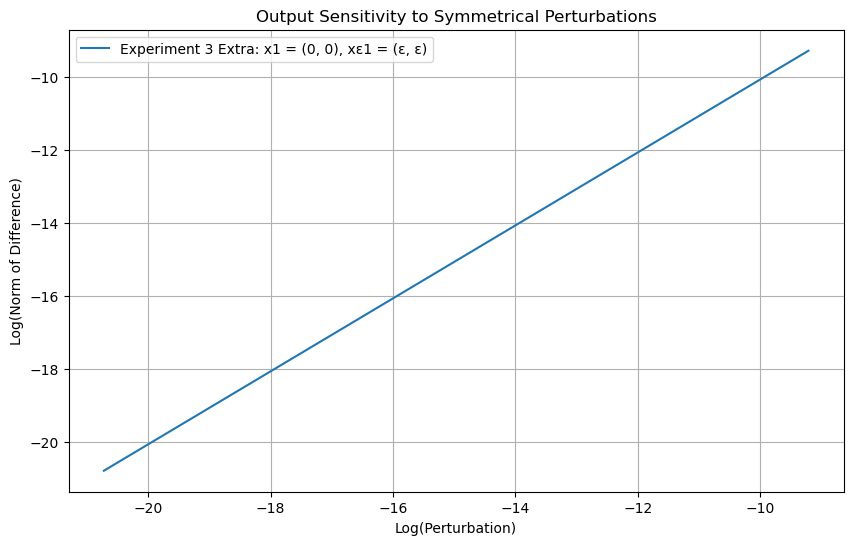

In [ ]:
def perform_extra_experiment(initial_x):
    """Perform the extra experiment with perturbations in the same positive direction."""
    yt = compute_output(initial_x, 0, extra=False)
    differences = []

    print("Perturbation   Difference")
    for perturbation in perturbations:
        yp = compute_output(initial_x, perturbation, extra=True)
        diff = norm(yt - yp)
        differences.append(diff)
        print(f"{perturbation:.1e}         {diff:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(np.log(perturbations), np.log(differences), label="Experiment 3 Extra: x1 = (0, 0), xε1 = (ε, ε)")
    plt.xlabel("Log(Perturbation)")
    plt.ylabel("Log(Norm of Difference)")
    plt.title("Output Sensitivity to Symmetrical Perturbations")
    plt.legend()
    plt.grid(True)
    plt.show()

    return np.log(perturbations), np.log(differences)

# Run the extra experiment
log_perturbations_extra, log_diff_extra = perform_extra_experiment(np.zeros((2, 1), dtype=np.float64))


### Extra

For the extra experiment, the log-log plot shows that the perturbations (ε, ε) have a negligible effect (relatively) on the output difference, suggesting that the network is relatively robust to small, symmetrical perturbations in the input. This could be because symmetrical perturbations might not significantly shift the pre-activation values away from the stable region of the tanh function or due to the particular structure of the recurrent matrix R which may allow for some perturbations to cancel out or not be amplified across timesteps. This result supports the hypothesis that for small perturbations (ε, δ), the output difference ||y30−yε30|| is expected to be small (≪ 1).
